# Existing Smallplexes in Los Angeles

For our group project, my team is researching the potential impact that the recently passed SB 9 can have on the supply of housing in Los Angeles California. One of our data sources will higlight lots in the city with existing smallplexes. This can potentially show the lack of availability of smallplexes as a housing option for Los Angeles residents, and how SB 9 can make smallplexes in Los Angeles a more common and affordable housing option. The dataset I used is the Building Permit Database available [here](https://data.lacity.org/City-Infrastructure-Service-Requests/Building-and-Safety-Permit-Information-Old/yv23-pmwf/data).  

For the purposes of this notebook, smallplexes will be defined as any strcture that has 2 to 4 housing units on the same lot. This notebook goes on to highlight the availability of smallplexes prior to the implementation of SB 9. 

## Step 1 

I imported all the libraries I potentially need.

In [1]:
import geopandas as gpd

import matplotlib.pyplot as plt

import networkx as nx

import osmnx as ox

import contextily as ctx

import pandas as pd

import folium

import plotly.express as px

## Step 2

I cleaned up my dataset on Excel and imported it to JupyterHub.

In [2]:
Smallplex_Data = gpd.read_file('Data/Smallplex Data.csv') 

## Step 3

I do some preliminary data exploration to see what I'm working with =

In [3]:
Smallplex_Data.head(5)

Assessor Book Assessor Page Assessor Parcel                 Tract Block Lot  \
0          5048             5              37               TR 6377     1  20   
1          4330             4              10              TR 11875        14   
2          2245             2              16               TR 6142        42   
3          5040            30              16  IRENE TOLCHARD TRACT         3   
4          2329            11               6               TR 1336         1   

  Reference # (Old Permit #)      PCIS Permit #       Status Status Date  ...  \
0                  20ON 1976  19010-20000-02371       Issued       44134  ...   
1                  17WL84002  17010-30000-00174  CofO Issued       43843  ...   
2                  14VN88831  13010-20000-00689  CofO Issued       43844  ...   
3                  18LA14011  16014-30000-06026  CofO Issued       43844  ...   
4                  20VN12690  19010-20000-03276       Issued       43851  ...   

    Applicant Address 1 Applicant Address 2 Applicant Address 3          Zone  \
0    10999 RIVERSIDE DR                #300    N. HOLLYWOOD, CA       RD1.5-1   
1                                                                [Q]RD2-1VL-O   
2  6411 INDEPENDENCE AV                      WOODLAND HILLS, CA    [Q]RD1.5-1   
3                                                                     RD1.5-1   
4   20806 SPRUCE CIRCLE                        PORTER RANCH, CA    [Q]RD1.5-1   

  Occupancy Floor Area-L.A. Building Code Definition Census Tract  Latitude  \
0                                               7029      2199.02  34.03317   
1                                              13233         2690  34.05319   
2                                               8660      1286.01   34.1786   
3                                               8768         2226  34.02108   
4                                               8814       1235.1  34.19371   

    Longitude geometry  
0  -118.36779     None  
1  -118.40537     None  
2  -118.44681     None  
3  -118.29312     None  
4  -118.42782     None  

[5 rows x 56 columns]

In [4]:
Smallplex_Data.tail(5)

Assessor Book Assessor Page Assessor Parcel  \
2347          5188             5              11   
2348          6031            13              26   
2349          5442             2             911   
2350          6031            30              22   
2351          6083            20              21   

                                           Tract  Block              Lot  \
2347                           THE SCHMITT TRACT      4               12   
2348        PECKHAM'S MONETA AVENUE SQUARE NO. 1                     171   
2349  SOUTHERN PACIFIC CLASSIFICATION YARD TRACT                    LT 2   
2350   INGHAM'S MAIN ST. AND MONETA AVENUE TRACT  BLK 2  "UNNUMBERED LT"   
2351                                     TR 3598                     196   

     Reference # (Old Permit #)      PCIS Permit #       Status Status Date  \
2347                  16SL59152  16010-70000-00783  CofO Issued       43473   
2348                  19LA16701  18010-10000-03536  CofO Issued       43634   
2349                  15LA50974  13010-10000-03088  CofO Issued       42462   
2350                  14LA35316  14010-10000-00833  CofO Issued       41990   
2351                  16LA74541  16010-10000-03939  CofO Issued       43068   

      ...  Applicant Address 1 Applicant Address 2   Applicant Address 3  \
2347  ...       PO BOX  882399                           LOS ANGELES, CA   
2348  ...   5452 OCEANUS DRIVE                      HUNTINGTON BEACH, CA   
2349  ...  475 WASHINGTON BLVD                            MARINA DEL REY   
2350  ...        P O  BOX  410                          SUNSET BEACH, CA   
2351  ...  19841 LEXINGTON LN.                      HUNTINGTON BEACH, CA   

             Zone Occupancy Floor Area-L.A. Building Code Definition  \
2347      RD1.5-1                                               2212   
2348         R2-1                                               4242   
2349  [Q]CM-1-CDO                                               4602   
2350         R2-1                                               3444   
2351         R2-1                                               4084   

     Census Tract  Latitude   Longitude geometry  
2347       2049.1  34.22457  -118.45555     None  
2348      2396.02   34.0454  -118.34351     None  
2349      1871.02  33.78053  -118.26362     None  
2350      2397.01  34.04377  -118.34489     None  
2351      2410.02  33.95727  -118.25779     None  

[5 rows x 56 columns]

In [5]:
Smallplex_Data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 56 columns):
 #   Column                                    Non-Null Count  Dtype   
---  ------                                    --------------  -----   
 0   Assessor Book                             2352 non-null   object  
 1   Assessor Page                             2352 non-null   object  
 2   Assessor Parcel                           2352 non-null   object  
 3   Tract                                     2352 non-null   object  
 4   Block                                     2352 non-null   object  
 5   Lot                                       2352 non-null   object  
 6   Reference # (Old Permit #)                2352 non-null   object  
 7   PCIS Permit #                             2352 non-null   object  
 8   Status                                    2352 non-null   object  
 9   Status Date                               2352 non-null   object  
 10  Permit Type     

## Step 4

I then generated the geometry column using the Latitude and Longitude information that the dataset came with. 

In [6]:
Smallplex_Data_With_Geometry = gpd.GeoDataFrame(Smallplex_Data,
                                                crs='epsg:4326',
                                                geometry= gpd.points_from_xy(Smallplex_Data.Longitude, Smallplex_Data.Latitude))

In [7]:
Smallplex_Data_With_Geometry.head(5)

Assessor Book Assessor Page Assessor Parcel                 Tract Block Lot  \
0          5048             5              37               TR 6377     1  20   
1          4330             4              10              TR 11875        14   
2          2245             2              16               TR 6142        42   
3          5040            30              16  IRENE TOLCHARD TRACT         3   
4          2329            11               6               TR 1336         1   

  Reference # (Old Permit #)      PCIS Permit #       Status Status Date  ...  \
0                  20ON 1976  19010-20000-02371       Issued       44134  ...   
1                  17WL84002  17010-30000-00174  CofO Issued       43843  ...   
2                  14VN88831  13010-20000-00689  CofO Issued       43844  ...   
3                  18LA14011  16014-30000-06026  CofO Issued       43844  ...   
4                  20VN12690  19010-20000-03276       Issued       43851  ...   

    Applicant Address 1 Applicant Address 2 Applicant Address 3          Zone  \
0    10999 RIVERSIDE DR                #300    N. HOLLYWOOD, CA       RD1.5-1   
1                                                                [Q]RD2-1VL-O   
2  6411 INDEPENDENCE AV                      WOODLAND HILLS, CA    [Q]RD1.5-1   
3                                                                     RD1.5-1   
4   20806 SPRUCE CIRCLE                        PORTER RANCH, CA    [Q]RD1.5-1   

  Occupancy Floor Area-L.A. Building Code Definition Census Tract  Latitude  \
0                                               7029      2199.02  34.03317   
1                                              13233         2690  34.05319   
2                                               8660      1286.01   34.1786   
3                                               8768         2226  34.02108   
4                                               8814       1235.1  34.19371   

    Longitude                     geometry  
0  -118.36779  POINT (-118.36779 34.03317)  
1  -118.40537  POINT (-118.40537 34.05319)  
2  -118.44681  POINT (-118.44681 34.17860)  
3  -118.29312  POINT (-118.29312 34.02108)  
4  -118.42782  POINT (-118.42782 34.19371)  

[5 rows x 56 columns]

<AxesSubplot:>

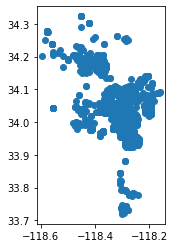

In [8]:
Smallplex_Data_With_Geometry.plot()

## Step 5 

The dataset came with a lot of columns that are unneeded for this particular analysis. Therefore, I dropped all the columns that I didn't need.

In [9]:
columns_to_keep = ['PCIS Permit #',
                   'Permit Type',
                   'Initiating Office',
                   'Issue Date',
                   'Zip Code',
                   'Valuation',
                   '# of Residential Dwelling Units',
                   'Census Tract',
                   'Latitude',
                   'Longitude',
                   'Zone',
                   'geometry']

In [10]:
Smallplex_Data_With_Geometry = Smallplex_Data_With_Geometry[columns_to_keep]

In [11]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [12]:
Smallplex_Data_With_Geometry.sample(10)

PCIS Permit #        Permit Type Initiating Office Issue Date  \
1906  15010-10000-00085           Bldg-New             METRO      42122   
382   19010-10000-03912           Bldg-New             METRO      43861   
2232  16010-10000-01275           Bldg-New             METRO      42552   
1571  14016-10000-25512           Bldg-New             METRO      42304   
1422  19010-20000-02213           Bldg-New          VAN NUYS      44095   
2034  18010-40000-00095           Bldg-New          SANPEDRO      43154   
827   15010-10000-02528           Bldg-New             METRO      42339   
87    12016-10000-21355  Bldg-Alter/Repair             METRO      41390   
747   17010-70000-04560           Bldg-New          SOUTH LA      43483   
927   17016-40000-07827  Bldg-Alter/Repair          SANPEDRO      42839   

     Zip Code Valuation # of Residential Dwelling Units Census Tract  \
1906    90037    360000                               2       2321.1   
382     90037    406235                               2         2319   
2232    90002    385000                               2       2400.2   
1571    90027    258000                               2      1912.01   
1422    91604    405000                               2         1433   
2034    90016    443000                               2         2198   
827     90037    385000                               2       2321.2   
87      90020     50000                               4      2119.22   
747     90044    313605                               2         2403   
927     90057         0                               2      2094.01   

      Latitude   Longitude                 Zone                     geometry  
1906  33.94904  -118.27543                RD2-1  POINT (-118.27543 33.94904)  
382   34.00654  -118.25896                 R2-1  POINT (-118.25896 34.00654)  
2232  33.98606  -118.28425                 R2-1  POINT (-118.28425 33.98606)  
1571   34.0473  -118.34825              RD2-1XL  POINT (-118.34825 34.04730)  
1422  33.99659  -118.28328  [T][Q]RD1.5-1VL-RIO  POINT (-118.28328 33.99659)  
2034  34.08258  -118.26437                RD2-1  POINT (-118.26437 34.08258)  
827    34.0008  -118.28391                RD2-1  POINT (-118.28391 34.00080)  
87    34.09566  -118.31114                 C2-1  POINT (-118.31114 34.09566)  
747   33.92448  -118.26939                RD2-1  POINT (-118.26939 33.92448)  
927   34.02284  -118.29284                 C2-1  POINT (-118.29284 34.02284)

## Step 6

I then analyzed how many duplexes, triplexes, and quadplexes are currently available in Los Angeles.

In [13]:
Smallplex_Data_With_Geometry['# of Residential Dwelling Units'].value_counts()

2    2059
3     158
4     135
Name: # of Residential Dwelling Units, dtype: int64

In [14]:
Number_of_Residential_Dwelling_Units = Smallplex_Data_With_Geometry['# of Residential Dwelling Units'].value_counts()
Number_of_Residential_Dwelling_Units

2    2059
3     158
4     135
Name: # of Residential Dwelling Units, dtype: int64

In [15]:
Number_of_Residential_Dwelling_Units = Number_of_Residential_Dwelling_Units.reset_index()
Number_of_Residential_Dwelling_Units

index  # of Residential Dwelling Units
0     2                             2059
1     3                              158
2     4                              135

In [16]:
Number_of_Residential_Dwelling_Units.columns = ['Number of Units', 'Count']
Number_of_Residential_Dwelling_Units

Number of Units  Count
0               2   2059
1               3    158
2               4    135

<AxesSubplot:title={'center':'Number of Residential Dwelling Units'}, xlabel='Number of Units'>

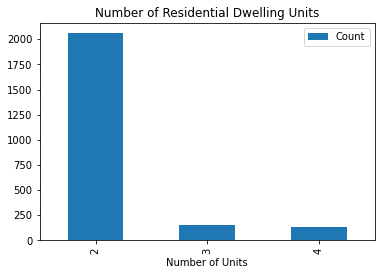

In [17]:
Number_of_Residential_Dwelling_Units.plot.bar(x = 'Number of Units',y = 'Count', title = 'Number of Residential Dwelling Units')

## Step 7

I wanted to create interactive tables and maps to better navigate the spatial data. I created 2 tables: 1 that highlights the availability of duplexes, triplexes and quadplexes and 1 that highlights the initiating office of these permits.

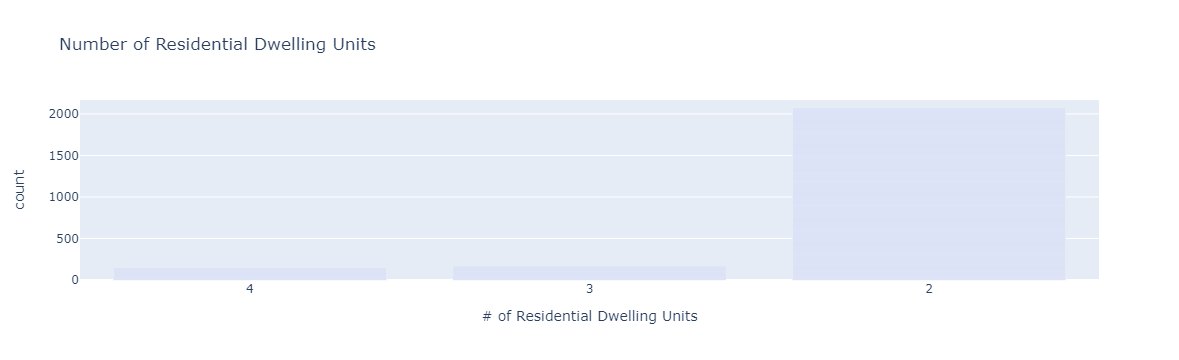

In [18]:
Dwelling_Units_Table = px.bar(Smallplex_Data_With_Geometry,
                              x = '# of Residential Dwelling Units',
                              title = 'Number of Residential Dwelling Units')
                              

Dwelling_Units_Table.show()

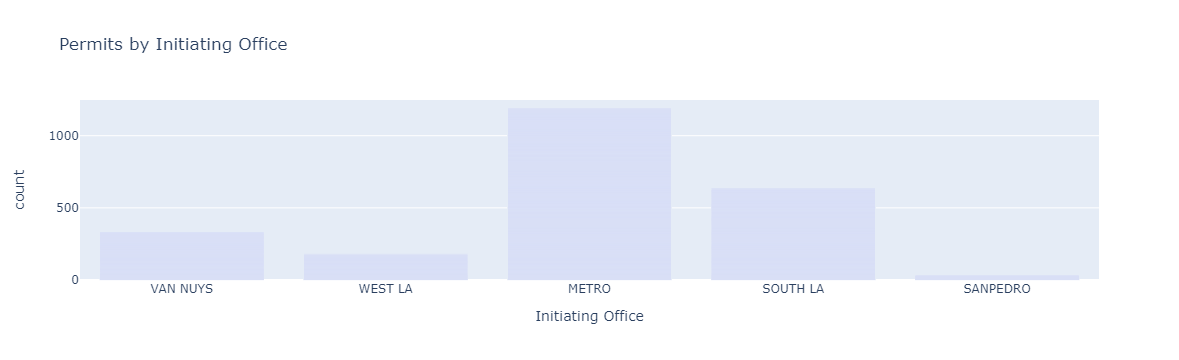

In [19]:
Initiating_Office_Table = px.bar(Smallplex_Data_With_Geometry,
                                 x = 'Initiating Office',
                                 title = 'Permits by Initiating Office')
 
Initiating_Office_Table.show()

## Step 8 

To properly plot the spatial data, I had to convert the 'latitude' and 'longitude'datatype from 'object' to 'float' to better utilize it. 

In [20]:
Smallplex_Data_With_Geometry['Latitude'] = Smallplex_Data_With_Geometry.Latitude.astype(float)
Smallplex_Data_With_Geometry['Longitude'] = Smallplex_Data_With_Geometry.Longitude.astype(float)


/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



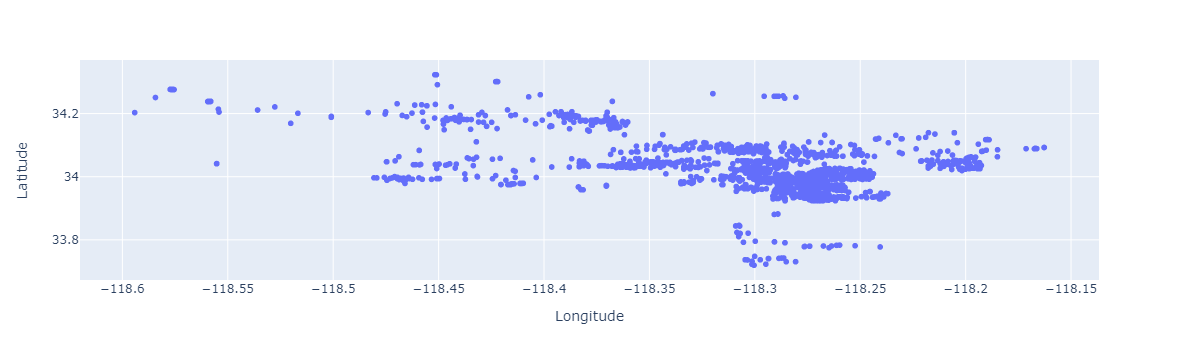

In [21]:
Table = px.scatter(Smallplex_Data_With_Geometry,
           x='Longitude',
           y='Latitude'
)

Table.show()

## Step 9 

I placed all the duplexes, triplexes, and quadplexes on a map.

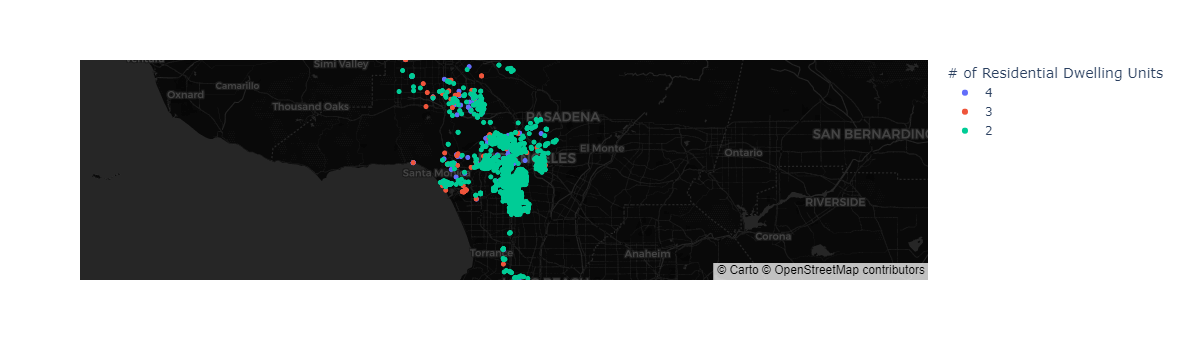

In [22]:
Table = px.scatter_mapbox(Smallplex_Data_With_Geometry,
                        lat='Latitude',
                        lon='Longitude',
                          color= '# of Residential Dwelling Units')
                        
Table.update_layout(mapbox_style="carto-darkmatter")
Table.show()

## Step 10

The map is very busy, so I plotted duplexes, triplexes, and quadplexes in different maps.

In [23]:
def smallplex_map(Dwelling = '2'):
    
    Table = px.scatter_mapbox(Smallplex_Data_With_Geometry[Smallplex_Data_With_Geometry['# of Residential Dwelling Units'] == Dwelling],
                                                      lat='Latitude',
                        lon='Longitude',
                          color= '# of Residential Dwelling Units')
    Table.update_layout(mapbox_style="carto-darkmatter")

    Table.show()

In [24]:
smallplex_list = Smallplex_Data_With_Geometry['# of Residential Dwelling Units'].unique().tolist()
smallplex_list

['4', '3', '2']

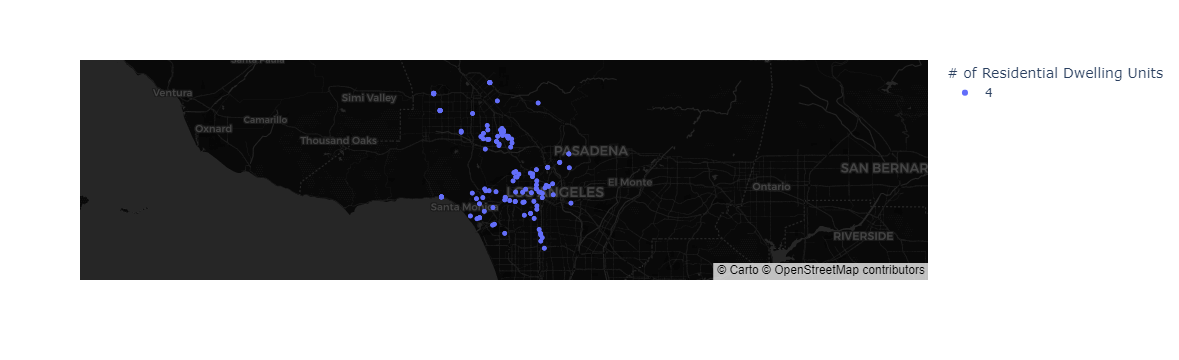

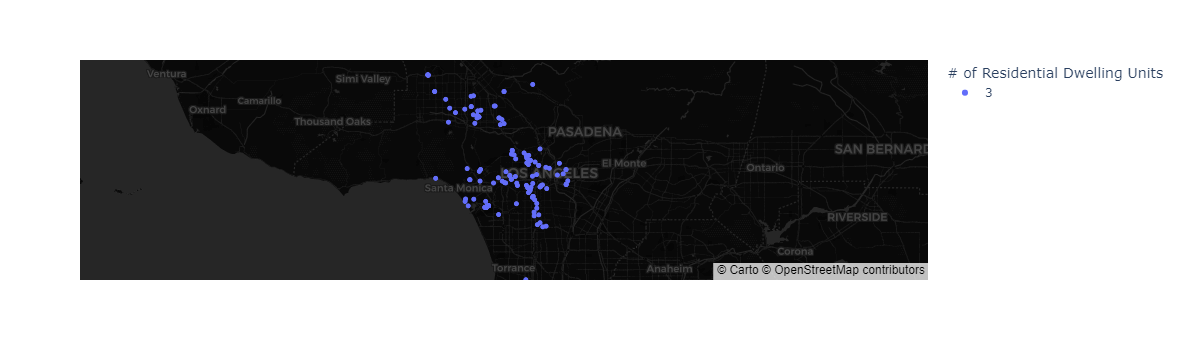

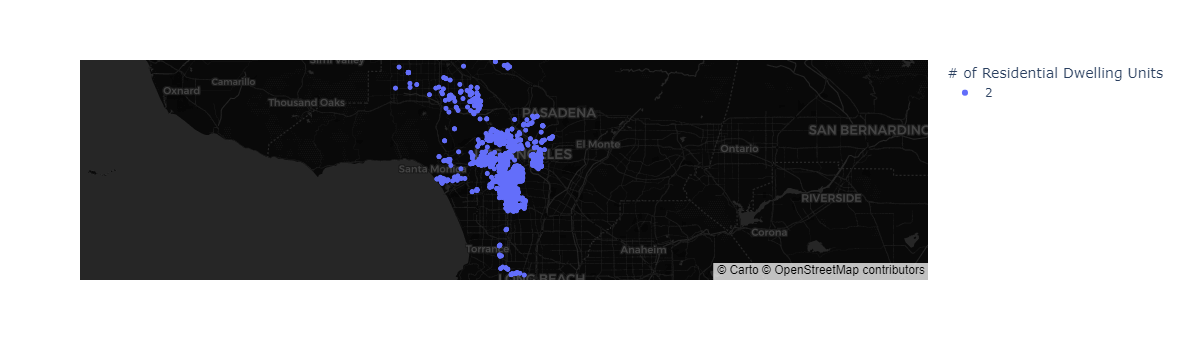

In [25]:
for Dwelling in smallplex_list:
    smallplex_map(Dwelling)

## Step 11

I thought that the initiating office column may help me gauge the spatial distribution of smallplexes in Los Angeles. It looks like it does to a certain degree, but overall there is really no correlation. I will need to find a different way to measure spatial distribution./

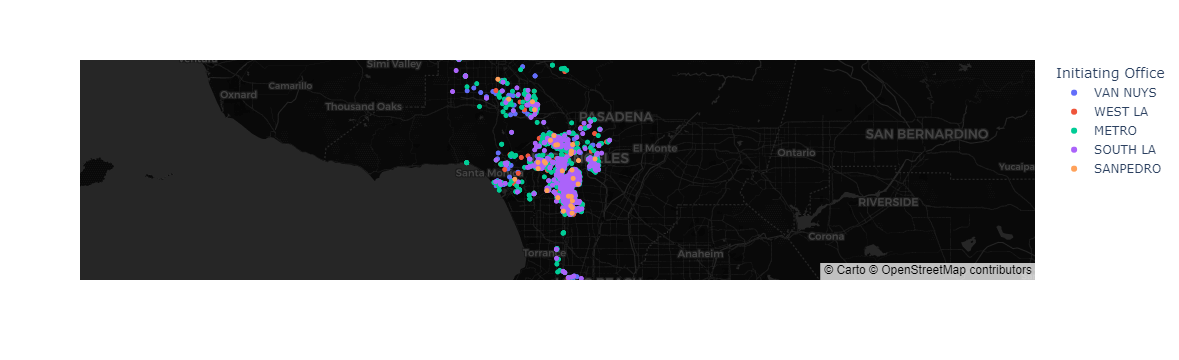

In [26]:
Table_2 = px.scatter_mapbox(Smallplex_Data_With_Geometry,
                        lat='Latitude',
                        lon='Longitude',
                          color= 'Initiating Office')
                        
Table_2.update_layout(mapbox_style="carto-darkmatter")
Table_2.show()

In [27]:
def smallplex_map_2(Office = 'SANPEDRO'):
    
    Table_2 = px.scatter_mapbox(Smallplex_Data_With_Geometry[Smallplex_Data_With_Geometry['Initiating Office'] == Office],
                                                      lat='Latitude',
                        lon='Longitude',
                          color= 'Initiating Office')
    Table_2.update_layout(mapbox_style="carto-darkmatter")

    Table_2.show()

In [28]:
smallplex_list_initiating_office = Smallplex_Data_With_Geometry['Initiating Office'].unique().tolist()
smallplex_list_initiating_office

['VAN NUYS', 'WEST LA', 'METRO', 'SOUTH LA', 'SANPEDRO']

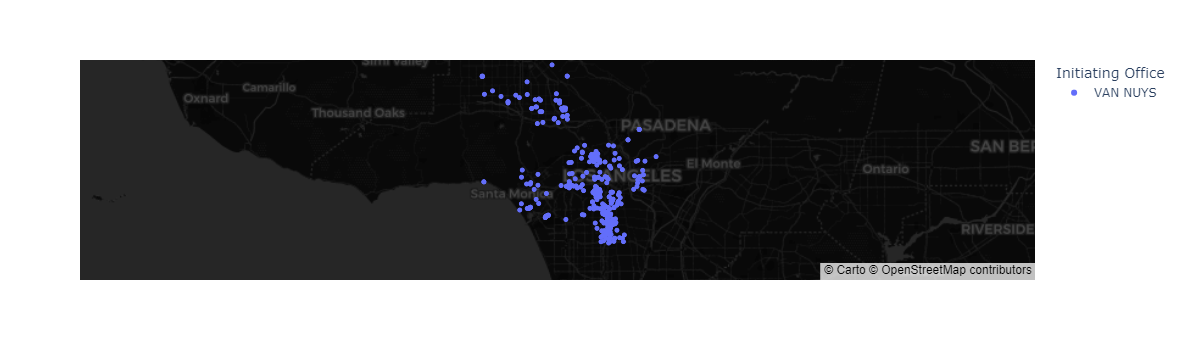

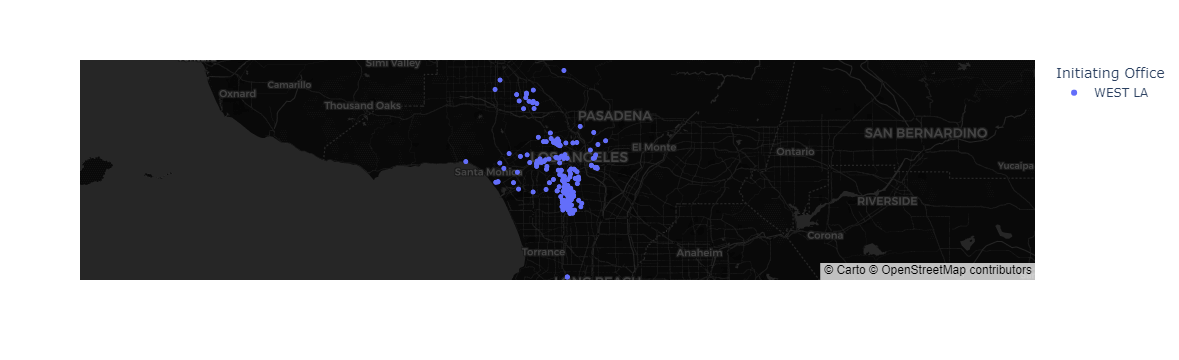

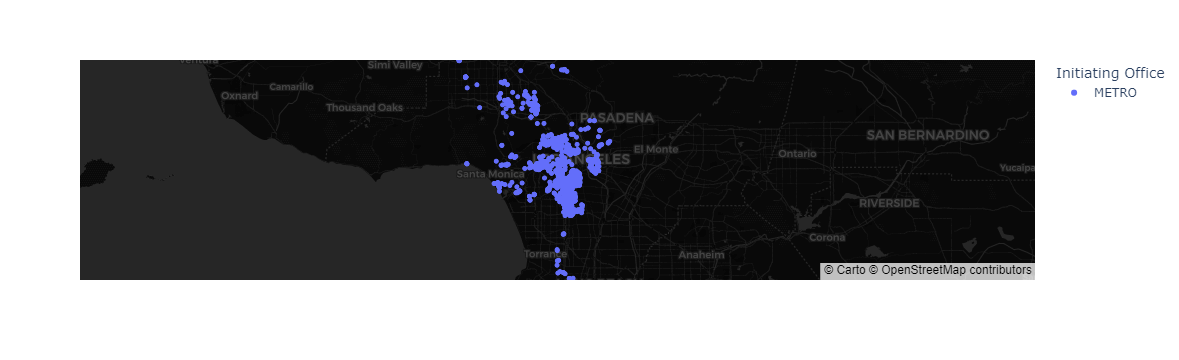

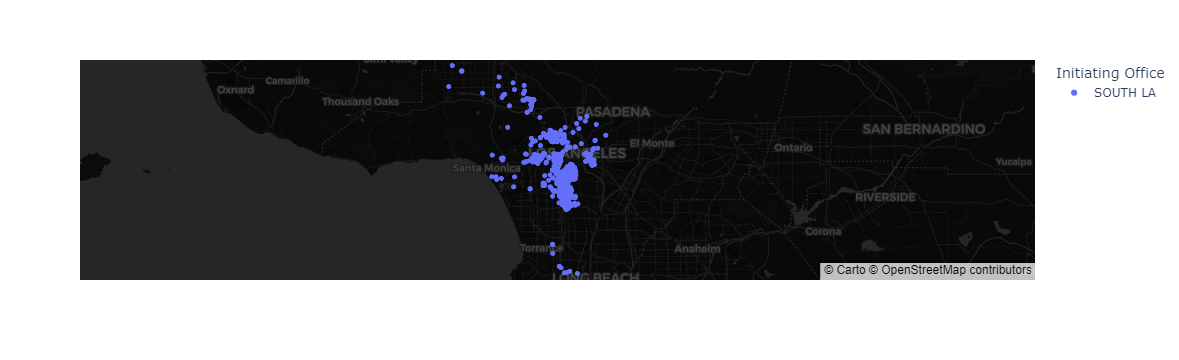

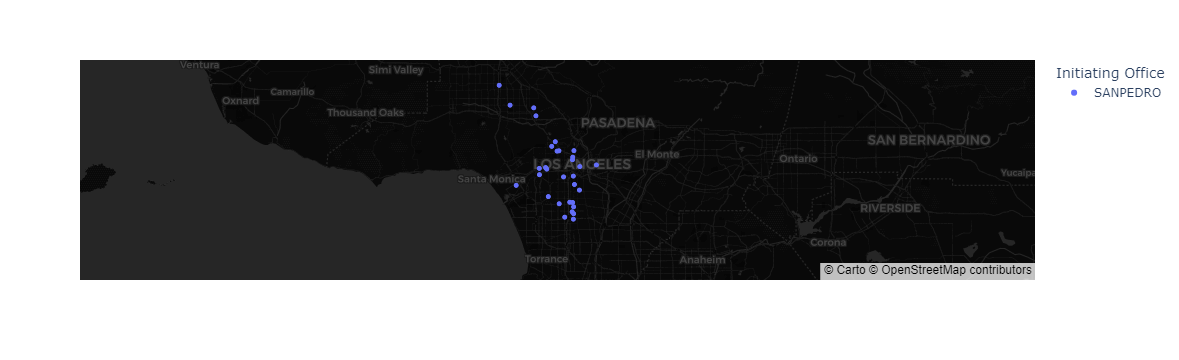

In [29]:
for Dwelling in smallplex_list_initiating_office:
    smallplex_map_2(Dwelling)

## Next Steps

Moving forward, I will overlay this data set with my partner's zoning map to highlight how many of these units currently exist in a single-family zone. I will also need to breakdown Los Angeles into smaller sections, to highlight the areas that have a need for smallplexes the most. We're thinking about using the neighborhood shapefile that the LA Timnes created. 